In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
data = pd.read_csv('../times.csv', names=['function', 'size', 'procs', 'time'], delimiter=';', skipinitialspace=True)

In [146]:
data['function'] = data.function.apply(lambda x: x.strip())
data = data[(data.function != 'mm_seq') | (data.procs == 1)]
data['pf'] = data.function.str.cat(data.procs.astype(str))
data2 = data[['pf', 'size', 'time']]
data2 = data2[data2['size'] != 896].groupby(['size', 'pf']).agg({'time': 'mean'})
data2

time
size pf                   
1    gauss_par1   0.000081
     gauss_par12  0.001413
     gauss_par16  0.001988
     gauss_par2   0.000184
     gauss_par3   0.000315
     gauss_par4   0.000499
     gauss_par6   0.002578
     gauss_par8   0.002519
     gauss_seq1   0.000004
     gauss_seq12  0.000002
     gauss_seq16  0.000002
     gauss_seq2   0.000002
     gauss_seq3   0.000002
     gauss_seq4   0.000003
     gauss_seq6   0.000003
     gauss_seq8   0.000002
     mm_par1      0.000218
     mm_par12     0.003663
     mm_par16     0.003502
     mm_par2      0.000366
     mm_par3      0.000551
     mm_par4      0.000912
     mm_par6      0.005125
     mm_par8      0.003989
     mm_seq1      0.000006
6    gauss_par1   0.000182
     gauss_par12  0.003264
     gauss_par16  0.003821
     gauss_par2   0.000311
     gauss_par3   0.000396
...                    ...
496  mm_par3      0.562939
     mm_par4      0.490786
     mm_par6      0.357297
     mm_par8      0.310571
     mm_seq1      1.245669
501  gauss_par1   0.605343
     gauss_par12  0.569172
     gauss_par16  0.442878
     gauss_par2   0.529894
     gauss_par3   0.465640
     gauss_par4   0.842442
     gauss_par6   0.725908
     gauss_par8   0.500213
     gauss_seq1   0.002321
     gauss_seq12  0.002833
     gauss_seq16  0.003373
     gauss_seq2   0.002481
     gauss_seq3   0.002650
     gauss_seq4   0.002830
     gauss_seq6   0.003632
     gauss_seq8   0.002935
     mm_par1      1.315162
     mm_par12     0.181189
     mm_par16     0.140088
     mm_par2      0.731211
     mm_par3      0.573024
     mm_par4      0.531005
     mm_par6      0.352878
     mm_par8      0.250091
     mm_seq1      1.250465

[2525 rows x 1 columns]

In [147]:
data3 = data2.unstack('pf')
data3

time                                                           \
pf   gauss_par1 gauss_par12 gauss_par16 gauss_par2 gauss_par3 gauss_par4   
size                                                                       
1      0.000081    0.001413    0.001988   0.000184   0.000315   0.000499   
6      0.000182    0.003264    0.003821   0.000311   0.000396   0.001262   
11     0.000366    0.005172    0.004214   0.000347   0.000491   0.000816   
16     0.000564    0.005417    0.005165   0.000565   0.000614   0.000911   
21     0.000909    0.006332    0.006489   0.000607   0.000831   0.001106   
26     0.000953    0.006479    0.007380   0.000896   0.001059   0.001636   
31     0.000941    0.007450    0.009990   0.001155   0.001391   0.016961   
36     0.001232    0.008754    0.012219   0.001504   0.001872   0.007564   
41     0.001699    0.009550    0.011114   0.001799   0.002228   0.014652   
46     0.001889    0.014560    0.014034   0.002259   0.002953   0.006719   
51     0.002411    0.014090    0.014807   0.002664   0.003968   0.007439   
56     0.003177    0.014633    0.015633   0.003271   0.008379   0.009000   
61     0.003883    0.015974    0.016648   0.004008   0.004754   0.011286   
66     0.004463    0.026184    0.022557   0.004818   0.005720   0.007447   
71     0.005044    0.017116    0.019608   0.005650   0.006355   0.013118   
76     0.005844    0.022264    0.026176   0.006471   0.006892   0.012537   
81     0.007097    0.029620    0.028471   0.007043   0.008322   0.020652   
86     0.007771    0.028880    0.026758   0.007920   0.008151   0.018839   
91     0.009616    0.026061    0.027258   0.008776   0.009944   0.017071   
96     0.009969    0.027353    0.034991   0.009655   0.012460   0.067833   
101    0.010373    0.028291    0.033438   0.010851   0.013038   0.025671   
106    0.012832    0.029903    0.039274   0.011568   0.016667   0.028231   
111    0.013227    0.033119    0.035245   0.013059   0.015214   0.038128   
116    0.014751    0.044342    0.042014   0.014678   0.019158   0.036733   
121    0.015706    0.039006    0.038874   0.015365   0.022983   0.061573   
126    0.016618    0.049188    0.053739   0.017392   0.021520   0.032204   
131    0.019292    0.053265    0.049822   0.018584   0.026957   0.073713   
136    0.020581    0.055229    0.045115   0.020834   0.022948   0.046612   
141    0.021974    0.047259    0.051397   0.021742   0.032440   0.034510   
146    0.021881    0.069951    0.055278   0.023535   0.058858   0.054219   
...         ...         ...         ...        ...        ...        ...   
356    0.245904    0.359591    0.283170   0.248939   0.205489   0.477333   
361    0.256833    0.301148    0.260292   0.250149   0.215466   0.317713   
366    0.268509    0.296649    0.273462   0.254957   0.216821   0.509843   
371    0.283528    0.312818    0.296596   0.256501   0.232101   0.661963   
376    0.292681    0.341219    0.261531   0.264569   0.245452   0.558766   
381    0.309352    0.338086    0.324198   0.276423   0.241418   0.358575   
386    0.320708    0.357919    0.292758   0.298390   0.285027   0.407758   
391    0.331022    0.329771    0.324967   0.301152   0.267463   0.634814   
396    0.329790    0.377318    0.275217   0.326556   0.280995   0.573333   
401    0.344555    0.460868    0.281095   0.327069   0.285572   0.539620   
406    0.353122    0.542157    0.311121   0.334807   0.308071   0.567697   
411    0.372098    0.454998    0.340616   0.353760   0.310190   0.527084   
416    0.379083    0.383688    0.328576   0.359503   0.362755   0.547556   
421    0.401707    0.454675    0.355148   0.361968   0.309959   0.921228   
426    0.398835    0.441790    0.380189   0.368850   0.322987   0.599970   
431    0.413779    0.437900    0.394687   0.404265   0.328630   0.623532   
436    0.426669    0.411077    0.402576   0.389371   0.344496   0.573676   
441    0.437137    0.415226    0.390115   0.395148   0.349864   0.628544   
446    0.444068    0.430726    0.384653   0.404189   0.3644

In [148]:
data3.columns = data3.columns.get_level_values(1)

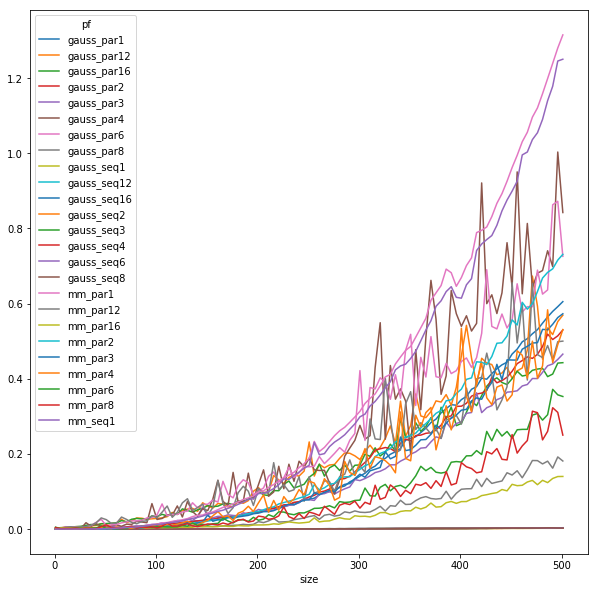

In [163]:
#data3[(data3.index > 877) & (data3.index < 914)].plot(figsize=(10,10))
data3.plot(figsize=(10,10))
#plt.savefig("mm.png")
plt.show()

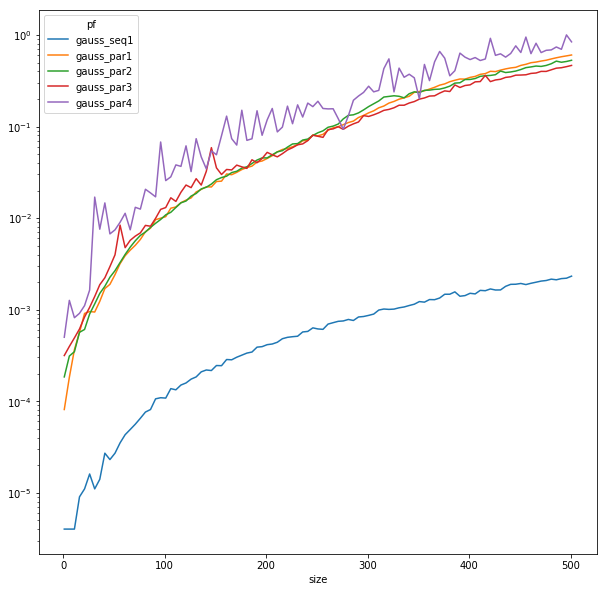

In [167]:
data3[['gauss_seq1', 'gauss_par1', 'gauss_par2', 'gauss_par3', 'gauss_par4']].plot(figsize=(10,10), logy = True)
#plt.savefig("gauss_log.png")
plt.show()

In [150]:
data4 = data3.stack()

In [151]:
data4 = data2
data4['time'] = np.cbrt(data4.time)
data4

time
size pf                   
1    gauss_par1   0.043267
     gauss_par12  0.112214
     gauss_par16  0.125729
     gauss_par2   0.056877
     gauss_par3   0.068041
     gauss_par4   0.079317
     gauss_par6   0.137118
     gauss_par8   0.136064
     gauss_seq1   0.015874
     gauss_seq12  0.012599
     gauss_seq16  0.012599
     gauss_seq2   0.012599
     gauss_seq3   0.012599
     gauss_seq4   0.014422
     gauss_seq6   0.014422
     gauss_seq8   0.012599
     mm_par1      0.060185
     mm_par12     0.154151
     mm_par16     0.151851
     mm_par2      0.071531
     mm_par3      0.081982
     mm_par4      0.096976
     mm_par6      0.172411
     mm_par8      0.158594
     mm_seq1      0.018171
6    gauss_par1   0.056671
     gauss_par12  0.148337
     gauss_par16  0.156329
     gauss_par2   0.067752
     gauss_par3   0.073434
...                    ...
496  mm_par3      0.825697
     mm_par4      0.788795
     mm_par6      0.709594
     mm_par8      0.677205
     mm_seq1      1.075972
501  gauss_par1   0.845929
     gauss_par12  0.828733
     gauss_par16  0.762245
     gauss_par2   0.809213
     gauss_par3   0.775086
     gauss_par4   0.944452
     gauss_par6   0.898726
     gauss_par8   0.793813
     gauss_seq1   0.132401
     gauss_seq12  0.141498
     gauss_seq16  0.149970
     gauss_seq2   0.135376
     gauss_seq3   0.138383
     gauss_seq4   0.141448
     gauss_seq6   0.153715
     gauss_seq8   0.143176
     mm_par1      1.095619
     mm_par12     0.565862
     mm_par16     0.519358
     mm_par2      0.900909
     mm_par3      0.830598
     mm_par4      0.809778
     mm_par6      0.706656
     mm_par8      0.630037
     mm_seq1      1.077351

[2525 rows x 1 columns]

In [152]:
data5 = data4.unstack('pf')
data5.columns = data5.columns.get_level_values(1)

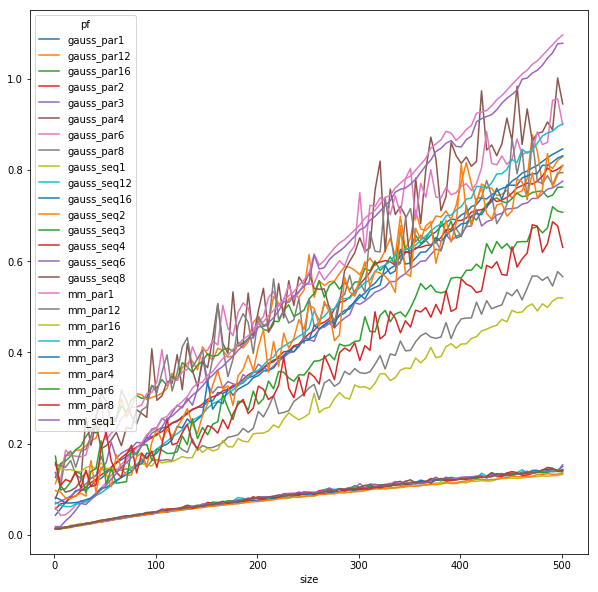

In [153]:
data5.plot(figsize=(10,10))
plt.show()

In [154]:
data6 = data
data6

,function,size,procs,time,pf
1,mm_par,1,16,0.003433,mm_par16
2,gauss_seq,1,16,0.000003,gauss_seq16
3,gauss_par,1,16,0.002327,gauss_par16
5,mm_par,6,16,0.003147,mm_par16
6,gauss_seq,6,16,0.000005,gauss_seq16
7,gauss_par,6,16,0.004153,gauss_par16
9,mm_par,11,16,0.002923,mm_par16
10,gauss_seq,11,16,0.000004,gauss_seq16
11,gauss_par,11,16,0.004223,gauss_par16
13,mm_par,16,16,0.002885,mm_par16


In [155]:
# #for i in data6.index:
# print(data6.size.astype(int))
# for i in range(data6.size.astype(int)):
#     if data6.iloc[i]['function'] == "mm_seq":
#         data6.iloc[i]['procs'] = data6.iloc[i + 1]['procs'] 

In [156]:
data6

,function,size,procs,time,pf
1,mm_par,1,16,0.003433,mm_par16
2,gauss_seq,1,16,0.000003,gauss_seq16
3,gauss_par,1,16,0.002327,gauss_par16
5,mm_par,6,16,0.003147,mm_par16
6,gauss_seq,6,16,0.000005,gauss_seq16
7,gauss_par,6,16,0.004153,gauss_par16
9,mm_par,11,16,0.002923,mm_par16
10,gauss_seq,11,16,0.000004,gauss_seq16
11,gauss_par,11,16,0.004223,gauss_par16
13,mm_par,16,16,0.002885,mm_par16


In [157]:
data7 = data
data7

,function,size,procs,time,pf
1,mm_par,1,16,0.003433,mm_par16
2,gauss_seq,1,16,0.000003,gauss_seq16
3,gauss_par,1,16,0.002327,gauss_par16
5,mm_par,6,16,0.003147,mm_par16
6,gauss_seq,6,16,0.000005,gauss_seq16
7,gauss_par,6,16,0.004153,gauss_par16
9,mm_par,11,16,0.002923,mm_par16
10,gauss_seq,11,16,0.000004,gauss_seq16
11,gauss_par,11,16,0.004223,gauss_par16
13,mm_par,16,16,0.002885,mm_par16


In [158]:
data7['n_procs'] = data7['procs'].shift(-1)

In [159]:
data7.loc[data7.function == 'mm_seq', 'procs'] = data7.n_procs

In [160]:
# data = data7[(data7.function != 'mm_seq') | (data7.procs == 1)]

In [161]:
data7['pf'] = data7.function.str.cat(data.procs.astype(str))
data8 = data7[(data7.function == 'mm_seq') &  (data7['size'] != 896)][['pf', 'size', 'time']]
data8 = data8.groupby(['size', 'pf']).agg({'time': 'mean'})
data8

,,time
size,pf,
1,mm_seq1.0,0.000006
6,mm_seq1.0,0.000006
11,mm_seq1.0,0.000029
16,mm_seq1.0,0.000067
21,mm_seq1.0,0.000158
26,mm_seq1.0,0.000330
31,mm_seq1.0,0.000294
36,mm_seq1.0,0.000460
41,mm_seq1.0,0.000668


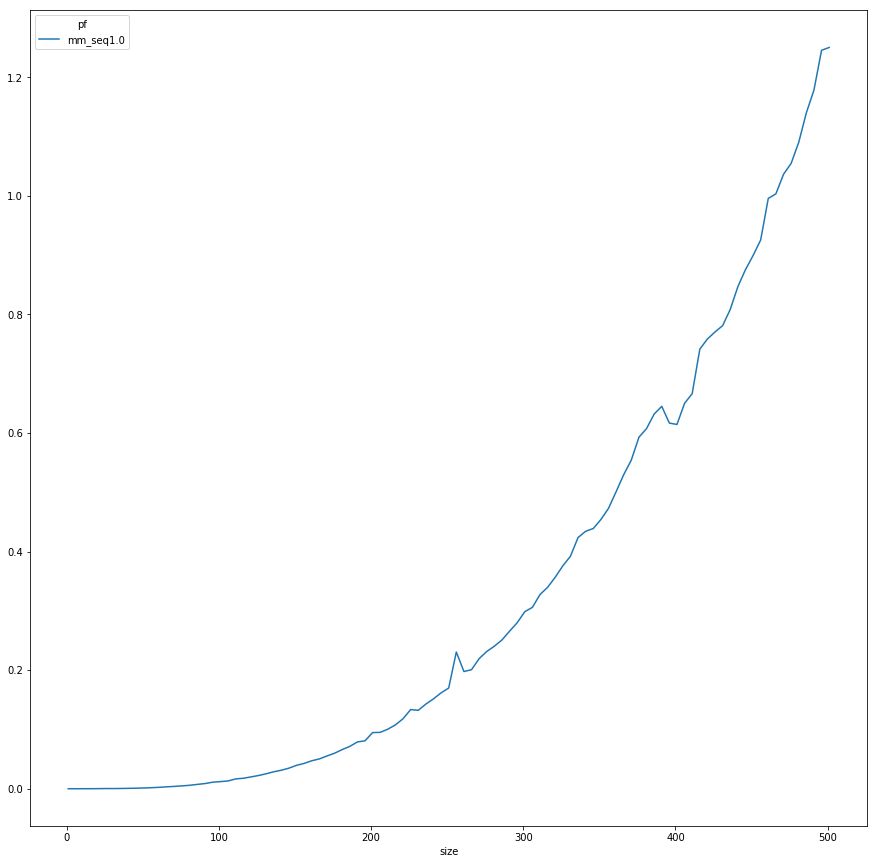

In [162]:
data9 = data8.unstack('pf')
data9.columns = data9.columns.get_level_values(1)
data9.plot(figsize = (15,15))
#plt.savefig("mm_seq.png", dpi=300)
plt.show()